# Support vector machine (SVM)

- Another repetitive code this time with a new method
- I'll try to do it better every time.
- Supplementary are available in my notebook, for further knowledge or any question, please contact : hoseinto@gmail.com

In [1]:
import pandas as pd
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split
import scipy.optimize as opt

## 1) Read CSV file and dealing with missing values

- Let's do it all in one stage

In [6]:
Data = pd.read_csv ("COVID.csv")
list_of_variables = ['Patient_Hospital', 'Outcome_InhospitalMortality', 
                     'Demographic_Age', 'Demographic_Gender',
                     'Symptom_LOC','Symptom_ChestPain', 'MH_CurremtSmoker', 'MH_IHD','VS_O2satwithoutsupp']
cdf = Data [list_of_variables]

for i in range (0, len (list_of_variables)):
    print (cdf [list_of_variables[i]].value_counts())
    
missing_counts = cdf.isnull().sum()
print(missing_counts)

Hospital1    4784
Hospital3    1749
Hospital2    1429
Hospital4    1172
Name: Patient_Hospital, dtype: int64
Survived    7239
Died        1816
Unknown       79
Name: Outcome_InhospitalMortality, dtype: int64
50.000     205
65.000     200
60.000     192
67.000     189
62.000     184
          ... 
798.000      1
0.250        1
9.000        1
0.125        1
0.170        1
Name: Demographic_Age, Length: 103, dtype: int64
Male      4942
Female    4132
1           35
2           24
0            1
Name: Demographic_Gender, dtype: int64
0.0    8404
1.0     729
Name: Symptom_LOC, dtype: int64
0    8315
1     819
Name: Symptom_ChestPain, dtype: int64
0    8679
1     455
Name: MH_CurremtSmoker, dtype: int64
0    6113
0    1782
1     973
1     265
١       1
Name: MH_IHD, dtype: int64
90.0    654
88.0    565
92.0    526
95.0    514
93.0    499
       ... 
42.0      1
34.0      1
87.5      1
36.0      1
37.0      1
Name: VS_O2satwithoutsupp, Length: 76, dtype: int64
Patient_Hospital                

C:\Users\Hossein Toreyhi\AppData\Local\Temp\ipykernel_14048\3148314477.py:1: DtypeWarning: Columns (5,9,12,13,14,18,19,20,24,25,32,33,36,37,41,44,45,48,49,50,52,53,54,56,57,58,59,61,63,64,65,69,74,76,78,79,81,83,84,85,86,87,88,90,93,94,95,96,97,98,99,100,102,103,104,105,106,107,108,109,110,113,114,116,117,119,120,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,153,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,193,194,195,196,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,279,280,281,282,283,284,285,287,288,289,290,291,292,293,295,296,297,298,299,300,301,305,306,307,308,310,311,3

In [7]:
# patient hospital

cdf.dropna(subset= ["Patient_Hospital"], inplace=True)
cdf ["Patient_Hospital"] = pd.factorize( cdf ["Patient_Hospital"])[0]

# Outcome_InhospitalMortality

outcome_map = {"Survived": 0, "Died" : 1 , "Unknown" : np.nan }
cdf ["Outcome_InhospitalMortality"] = cdf ["Outcome_InhospitalMortality"].replace(outcome_map)
cdf.dropna(subset= ["Outcome_InhospitalMortality"], inplace=True)

# Demographic_Age and 'VS_O2satwithoutsupp'

from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(cdf [['Demographic_Age', 'VS_O2satwithoutsupp']])
cdf[['Demographic_Age', 'VS_O2satwithoutsupp']] = imp.transform(cdf[['Demographic_Age', 'VS_O2satwithoutsupp']])

# Demographic_Gender

sex_map = {"1":"Male" , "2":"Female" , "0" : np.nan}
cdf ["Demographic_Gender"] = cdf ["Demographic_Gender"].replace(sex_map)
cdf.dropna(subset=["Demographic_Gender"], inplace=True)
cdf ["Demographic_Gender"] = pd.factorize( cdf ["Demographic_Gender"])[0]


# Symptom_LOC

cdf ["Symptom_LOC"] = cdf ["Symptom_LOC"].astype (float)
cdf.dropna(subset=["Symptom_LOC"], inplace=True)

# Symptom_ChestPain

cdf.dropna(subset=["Symptom_ChestPain"], inplace=True)
cdf ["Symptom_ChestPain"] = cdf ["Symptom_ChestPain"].astype (float)

# MH_CurremtSmoker 

cdf.dropna(subset=["MH_CurremtSmoker"], inplace=True)
cdf ["MH_CurremtSmoker"] = cdf ["MH_CurremtSmoker"].astype (float)

# MH_IHD

cdf.dropna(subset=["MH_IHD"], inplace=True)
cdf ["MH_IHD"] = cdf ["MH_IHD"].astype (float)

missing_counts = cdf.isnull().sum()
print(missing_counts)

C:\Users\Hossein Toreyhi\AppData\Local\Temp\ipykernel_14048\1854485196.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cdf.dropna(subset= ["Patient_Hospital"], inplace=True)
C:\Users\Hossein Toreyhi\AppData\Local\Temp\ipykernel_14048\1854485196.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cdf ["Patient_Hospital"] = pd.factorize( cdf ["Patient_Hospital"])[0]
C:\Users\Hossein Toreyhi\AppData\Local\Temp\ipykernel_14048\1854485196.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

Patient_Hospital               0
Outcome_InhospitalMortality    0
Demographic_Age                0
Demographic_Gender             0
Symptom_LOC                    0
Symptom_ChestPain              0
MH_CurremtSmoker               0
MH_IHD                         0
VS_O2satwithoutsupp            0
dtype: int64


C:\Users\Hossein Toreyhi\AppData\Local\Temp\ipykernel_14048\1854485196.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cdf[['Demographic_Age', 'VS_O2satwithoutsupp']] = imp.transform(cdf[['Demographic_Age', 'VS_O2satwithoutsupp']])
C:\Users\Hossein Toreyhi\AppData\Local\Temp\ipykernel_14048\1854485196.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cdf ["Demographic_Gender"] = cdf ["Demographic_Gender"].replace(sex_map)
C:\Users\Hossein Toreyhi\AppData\Local\Temp\ipykernel_14048\1854485196.py:23: 

## 2) Scatter plot

- I was thinking this morning about this code and I thought it would be better with an scatter plot showing the outcome in different color to see how much is necessary to use hyperdimension and hyperplane.
- God knows ! maybe logistic regression would be enough in the begining.
- I'm showing in 2 dimensions, that not enough !

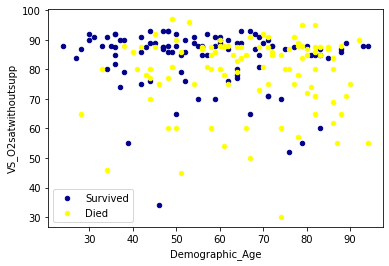

In [13]:
ax = cdf [cdf ['Outcome_InhospitalMortality'] == 0][0:100].plot(kind='scatter', x='Demographic_Age', y='VS_O2satwithoutsupp', color='DarkBlue', label='Survived');
cdf [cdf ['Outcome_InhospitalMortality'] == 1][0:100].plot(kind='scatter', x='Demographic_Age', y='VS_O2satwithoutsupp', color='Yellow', label='Died', ax=ax);
plt.show()


- fotunatly, it is obvious that we need a hyperplane in a higher dimension to seperate our outcome of interest

## 3) Data cleansing and preprocessing

In [15]:
cdf.dtypes

Patient_Hospital                 int64
Outcome_InhospitalMortality    float64
Demographic_Age                float64
Demographic_Gender               int64
Symptom_LOC                    float64
Symptom_ChestPain              float64
MH_CurremtSmoker               float64
MH_IHD                         float64
VS_O2satwithoutsupp            float64
dtype: object

- as you can see, all values are nubmers :))
- if there was any object in dtypes, you should use the following code to fix it : 


In [16]:
# cdf = cdf[pd.to_numeric(cdf['Name of inappropriate variable'], errors='coerce').notnull()]
# cdf['Name of inappropriate variable'] = cdf['Name of inappropriate variable'].astype('int')

## 4) Data selection and preprocessing

- x,y 

In [17]:
x_list = ['Patient_Hospital', 'Demographic_Age', 'Demographic_Gender','Symptom_LOC',
          'Symptom_ChestPain', 'MH_CurremtSmoker', 'MH_IHD','VS_O2satwithoutsupp']

x = np.asarray (cdf [x_list])
x = preprocessing.StandardScaler().fit(x).transform(x)
y = np.asarray (cdf ['Outcome_InhospitalMortality'])

## 5) Train/test split

In [18]:
x_train, x_test, y_train, y_test = train_test_split (x,y,test_size = 0.2, random_state = 4)

## 6) Model training and tuning 

- kerneling type can be on of the following : 1.Linear  2.Polynomial  3.Radial basis function (RBF)  4.Sigmoid

In [19]:
from sklearn import svm
clf = clf = svm.SVC(kernel='rbf')
clf.fit(x_train, y_train)
y_hat = clf.predict(x_test)

## 7) Evaluation 

- confusion matrix
- F1 score, precision and recall
- LogLoss

Confusion matrix, without normalization
[[ 110  278]
 [  59 1364]]


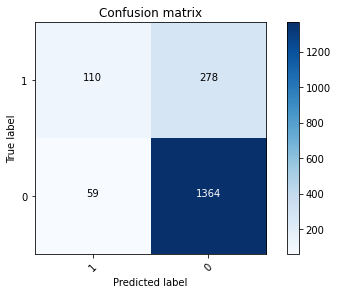

In [20]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

cnf_matrix = confusion_matrix(y_test, y_hat, labels=[1,0])
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['1','0'],normalize= False,  title='Confusion matrix')

In [21]:
from sklearn.metrics import classification_report
print (classification_report(y_test, y_hat))

              precision    recall  f1-score   support

         0.0       0.83      0.96      0.89      1423
         1.0       0.65      0.28      0.39       388

    accuracy                           0.81      1811
   macro avg       0.74      0.62      0.64      1811
weighted avg       0.79      0.81      0.78      1811



In [22]:
from sklearn.metrics import log_loss
log_loss(y_test, y_hat)

6.7071845345844725